# GradCAM Visualization Demo with VGG16

Requirement:

* GPU Memory: 6GB or higher

In [1]:
import numpy as np
from model import vgg16
import utils
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16    import decode_predictions
from keras.preprocessing.image import load_img
import tensorflow as tf
import os
from tensorflow.python.framework import ops
from tensorflow.python.ops import gen_nn_ops
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

C:\Users\wukai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

@ops.RegisterGradient("GuidedRelu")
def _GuidedReluGrad(op, grad):
    return tf.where(0. < grad, gen_nn_ops.relu_grad(grad, op.outputs[0]), tf.zeros(grad.get_shape()))

In [6]:
folder = './input/'
filenames   = os.listdir(folder)
line_number = len(filenames)
print(filenames,line_number)
batch_img,batch_label = [],[]
vgg = VGG16(weights='imagenet')
for line, filename in enumerate(filenames):
    raw_image  = load_img(folder + filename,target_size=(224, 224))
    batch = img_to_array(raw_image)
    batch = batch.reshape((1, 224, 224, 3))
    pred = vgg.predict(batch)
    index = np.argmax(pred)
    label = decode_predictions(pred)[:3]
    # Now making batch image for Grad-CAM
    img = utils.load_image(folder + filename)
    batch_im = img.reshape((1, 224, 224, 3))
    batch_img.append(batch_im)
    batch_label.append(np.array([1 if i == index else 0 for i in range(1000)]).reshape(1, -1))
batch_size = len(batch_img)
batch_img = np.concatenate(tuple(batch_img),0)
batch_label = np.concatenate(tuple(batch_label),0)

print(batch_img.shape)

['agama.jpg', 'agama_FGSM.jpg', 'dog.jpg', 'dog_FGSM.jpg', 'magpie.jpg', 'magpie_FGSM.jpg', 'pandas.jpg', 'pandas_FGSM.jpg', 'z_perlin_noise.jpg', 'z_UAP.JPG'] 10
(10, 224, 224, 3)


C:\Users\wukai\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


C:\Users\wukai\Grad-CAM-tensorflow\model\vgg16.npy
npy file loaded
build model started
build model finished: 4s
cost: Tensor("mul_2:0", shape=(10,), dtype=float32)
y_c: Tensor("Sum_1:0", shape=(10,), dtype=float32)
Top1:  n01687978 agama 1.0
Top5:  [('n01687978 agama', 1.0), ('n01685808 whiptail, whiptail lizard', 2.398129e-08), ('n01630670 common newt, Triturus vulgaris', 8.266431e-09), ('n01677366 common iguana, iguana, Iguana iguana', 5.4689173e-09), ('n01693334 green lizard, Lacerta viridis', 3.6970258e-09)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


C:\Users\wukai\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


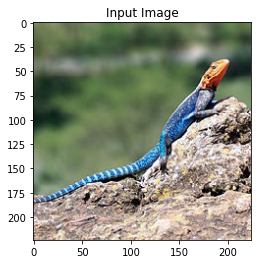

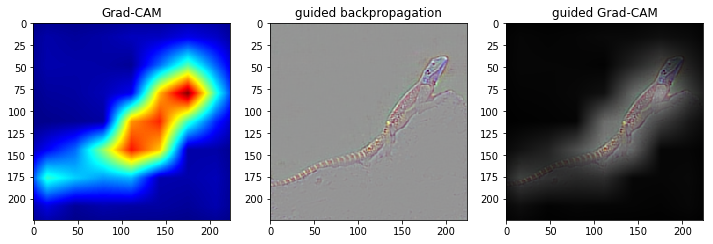

Top1:  n01687978 agama 0.9998795
Top5:  [('n01687978 agama', 0.9998795), ('n01630670 common newt, Triturus vulgaris', 2.9829838e-05), ('n01685808 whiptail, whiptail lizard', 2.3193357e-05), ('n01677366 common iguana, iguana, Iguana iguana', 1.2078659e-05), ('n01693334 green lizard, Lacerta viridis', 1.0310735e-05)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


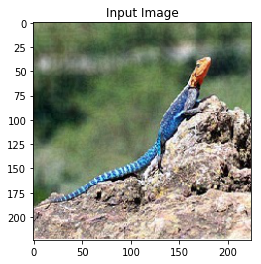

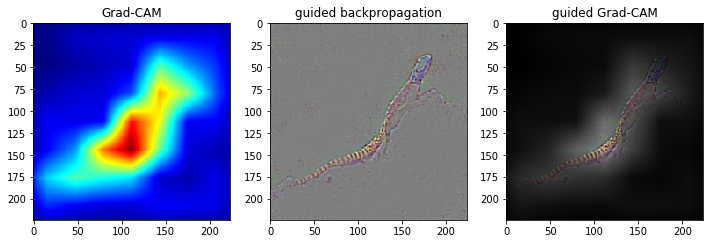

Top1:  n02099712 Labrador retriever 0.6515798
Top5:  [('n02099712 Labrador retriever', 0.6515798), ('n02099601 golden retriever', 0.18871221), ('n04409515 tennis ball', 0.04193682), ('n02088364 beagle', 0.01221994), ('n02099849 Chesapeake Bay retriever', 0.008089518)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


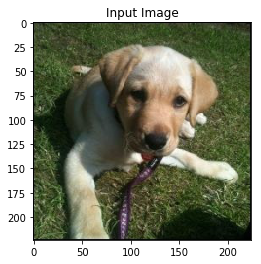

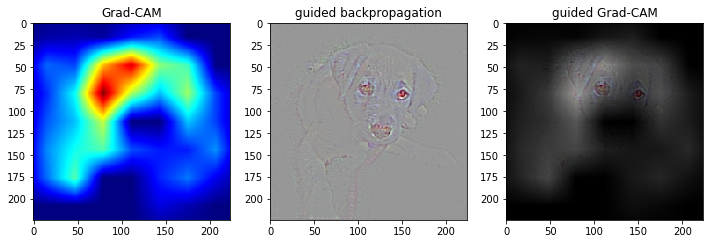

Top1:  n02095314 wire-haired fox terrier 0.110916644
Top5:  [('n02095314 wire-haired fox terrier', 0.110916644), ('n02093754 Border terrier', 0.10699137), ('n03803284 muzzle', 0.07296345), ('n04409515 tennis ball', 0.051466316), ('n02097047 miniature schnauzer', 0.05020135)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


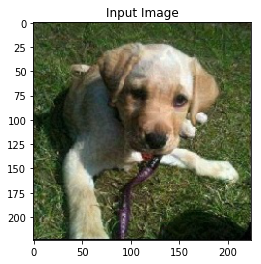

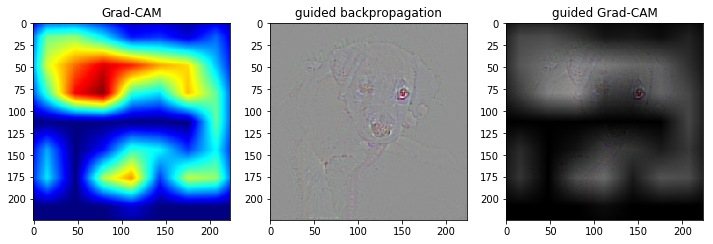

Top1:  n01582220 magpie 0.99980944
Top5:  [('n01582220 magpie', 0.99980944), ('n02037110 oystercatcher, oyster catcher', 6.5126376e-05), ('n01601694 water ouzel, dipper', 4.4276912e-05), ('n01580077 jay', 1.994168e-05), ('n01795545 black grouse', 1.9622183e-05)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


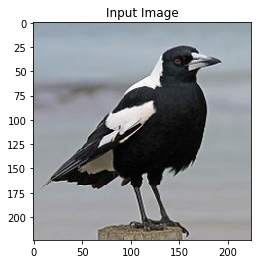

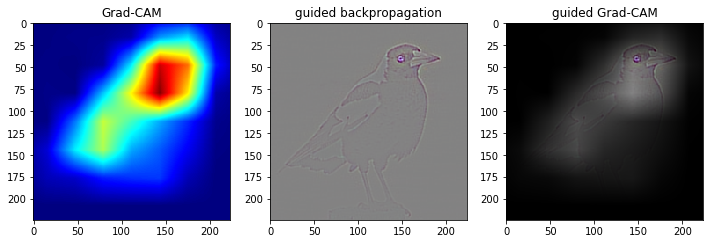

Top1:  n01795545 black grouse 0.63865393
Top5:  [('n01795545 black grouse', 0.63865393), ('n01806567 quail', 0.10702812), ('n01582220 magpie', 0.09833158), ('n01798484 prairie chicken, prairie grouse, prairie fowl', 0.07928284), ('n01616318 vulture', 0.014914161)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


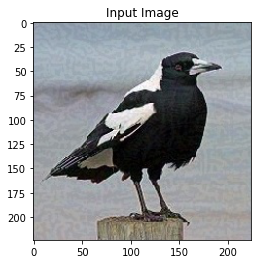

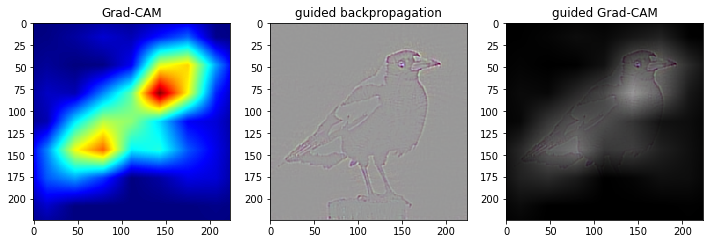

Top1:  n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca 0.9999999
Top5:  [('n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 0.9999999), ('n02488702 colobus, colobus monkey', 8.4633875e-08), ('n02483362 gibbon, Hylobates lar', 3.2289435e-08), ('n02500267 indri, indris, Indri indri, Indri brevicaudatus', 9.211369e-10), ('n02492035 capuchin, ringtail, Cebus capucinus', 1.361302e-10)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


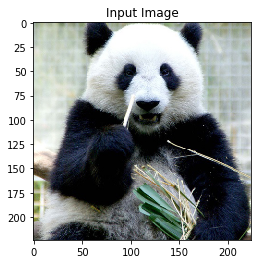

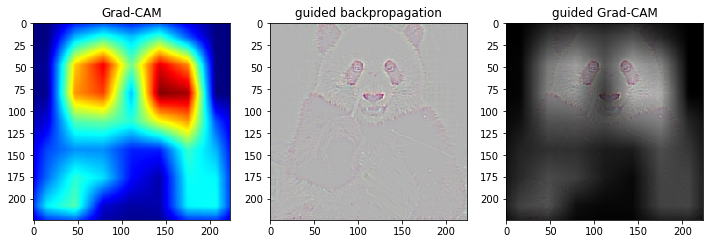

Top1:  n02483362 gibbon, Hylobates lar 0.9722074
Top5:  [('n02483362 gibbon, Hylobates lar', 0.9722074), ('n02488702 colobus, colobus monkey', 0.016367424), ('n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 0.009093906), ('n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus', 0.0012777188), ('n02500267 indri, indris, Indri indri, Indri brevicaudatus', 0.0005749669)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


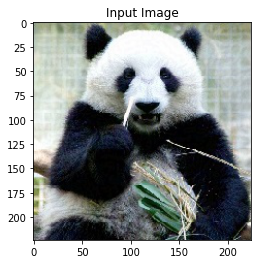

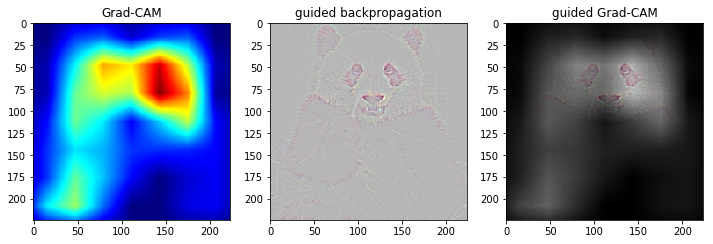

Top1:  n04209239 shower curtain 0.11880874
Top5:  [('n04209239 shower curtain', 0.11880874), ('n03291819 envelope', 0.07217579), ('n02834397 bib', 0.060505345), ('n02840245 binder, ring-binder', 0.05038947), ('n03485794 handkerchief, hankie, hanky, hankey', 0.030491343)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


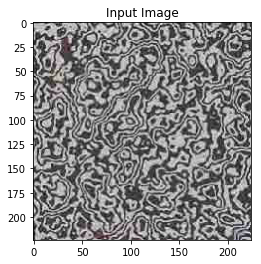

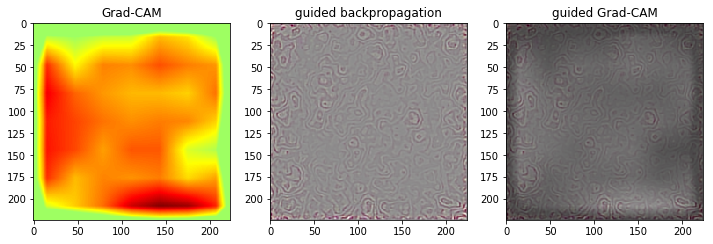

Top1:  n01514668 cock 0.7818736
Top5:  [('n01514668 cock', 0.7818736), ('n01806143 peacock', 0.0453652), ('n01514859 hen', 0.029501716), ('n02364673 guinea pig, Cavia cobaya', 0.021082018), ('n02112706 Brabancon griffon', 0.014150504)]
grads_val shape: (7, 7, 512)
gb_viz shape: (224, 224, 3)


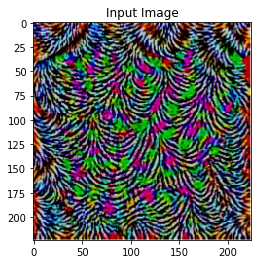

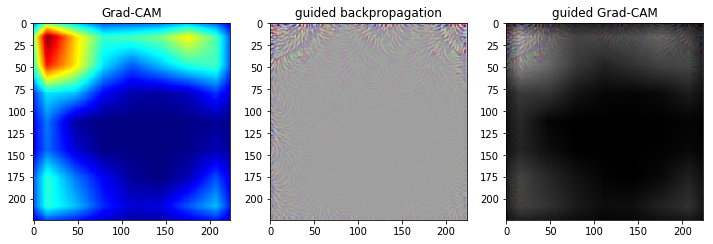

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
 
# for i in range(batch_size):
#     print('See visualization of below category')
#     utils.print_prob(batch_label[i], './synset.txt')

# Create tensorflow graph for evaluation
eval_graph = tf.Graph()
with eval_graph.as_default():
    with eval_graph.gradient_override_map({'Relu': 'GuidedRelu'}):
    
        images = tf.placeholder("float", [batch_size, 224, 224, 3])
        labels = tf.placeholder(tf.float32, [batch_size, 1000])

        vgg = vgg16.Vgg16()
        
        vgg.build(images)
        cost = (-1) * tf.reduce_sum(tf.multiply(labels, tf.log(vgg.prob)), axis=1)
        print('cost:', cost)
        # cost = tf.reduce_sum((vgg.prob - labels) ** 2)
        
        
        # gradient for partial linearization. We only care about target visualization class. 
        y_c = tf.reduce_sum(tf.multiply(vgg.fc8, labels), axis=1)
        print('y_c:', y_c)
        # Get last convolutional layer gradient for generating gradCAM visualization
        target_conv_layer = vgg.pool5
        target_conv_layer_grad = tf.gradients(y_c, target_conv_layer)[0]

        # Guided backpropagtion back to input layer
        gb_grad = tf.gradients(cost, images)[0]

        init = tf.global_variables_initializer()

        
# Run tensorflow 

with tf.Session(graph=eval_graph) as sess:    
    sess.run(init)
    
    prob = sess.run(vgg.prob, feed_dict={images: batch_img})
    
    gb_grad_value, target_conv_layer_value, target_conv_layer_grad_value = sess.run([gb_grad, target_conv_layer, target_conv_layer_grad], feed_dict={images: batch_img, labels: batch_label})
    
    
    for i in range(batch_size):
        utils.print_prob(prob[i], './synset.txt')
        # VGG16 use BGR internally, so we manually change BGR to RGB
        gradBGR = gb_grad_value[i]
        gradRGB = np.dstack((
            gradBGR[:, :, 2],
            gradBGR[:, :, 1],
            gradBGR[:, :, 0],
        ))
        utils.visualize(batch_img[i], target_conv_layer_value[i], target_conv_layer_grad_value[i], gradRGB)


    